## **SCA Final Project (Data Track)**

#Data Set Used: Zomato Restaurant 



# About Zomato Restruant

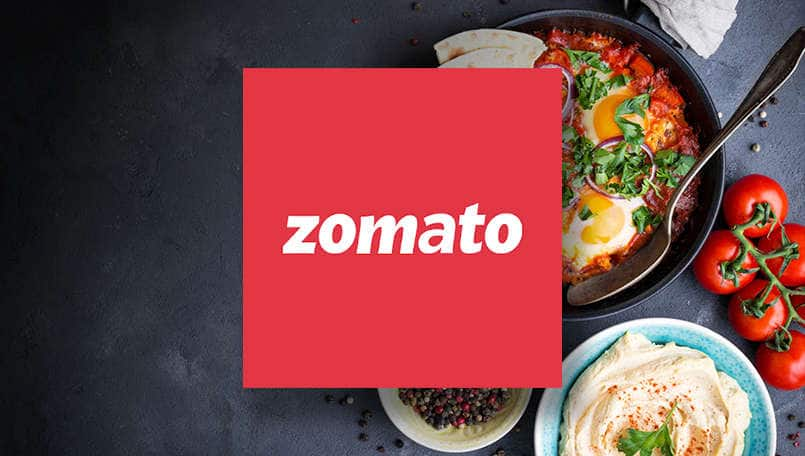


# Zomato is an Indian multinational restaurant food delivery company.

##**Project** **Objectives**

*   Zomato Restaurant analysis aims to assisst foodies who want to taste the best cuisines of every part of the world which lies in their budget. 

*   This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. 
*   Additionally, this analysis caters for the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

*   Lastly this analysis aims to predict price of cuisines. 








### **Exploring and Cleaning the Data Set**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
%matplotlib inline


In [ ]:
#importing zomato data set
zomato = pd.read_csv('Zomato_rest.csv', encoding = "ISO-8859-1")
zomato.head()

FileNotFoundError: ignored

In [ ]:
#checking for data set shape
zomato.shape

(9542, 21)

In [ ]:
#checking for missing values
zomato.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In checking for missing value, the column cuisine has 9 missing values of which i decided to drop ince it is not much.

In [ ]:
zomato.dropna(inplace=True)

In [ ]:
zomato.isna().sum()

**Checking for missing duplicates. We had no missing duplicates**

In [ ]:

duplicate_rows = zomato[zomato.duplicated()]
duplicate_rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


**Looking at the types of data in different columns of the dataset**

In [ ]:

zomato.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code             object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

**Replacing country code with name of country for better visualzation**

In [ ]:

zomato['Country Code'] = zomato['Country Code'].replace([1,14, 30, 37,94,148, 162,166,184, 189, 191,208, 214,215,216],
                                                  ['India','Australia','Brazil','Canada','Indonesia', 
                                                   'New Zealand', 'Phillipines','Qatar','Singapore','South Africa',
                                                   'Sri Lanka','Turkey', 'UAE', 'United Kingdom','United States'])



In [ ]:
zomato.head(15)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,Phillipines,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Phillipines,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Phillipines,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Phillipines,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Phillipines,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,Phillipines,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,Phillipines,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,Phillipines,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,Phillipines,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,Phillipines,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


**Renaming Columns to maintain consistency of names**

In [ ]:

zomato.rename({'Country Code':'Country_Code','Average Cost for two': 'Average_Cost_for_two',
               'Price range':'Price_range','Aggregate rating':'Aggregate_rating',
               'Rating text':'Rating_text', 'Locality Verbose':'Locality_Verbose','Has Table booking': 'Has_Table_booking',
               'Has Online delivery':'Has_Online_delivery', 'Is delivering now':'Is_delivering_now',
                'Restaurant ID':'Restaurant_ID', 'Restaurant Name':'Restaurant_Name',
              'Switch to order menu':'Switch_to_order_menu', 'Rating color':'Rating_color',},
                                        axis= 1, inplace=True)      
zomato.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,Phillipines,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Phillipines,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Phillipines,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Phillipines,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Phillipines,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Viewing my dataset at a glance to see how my data is

<AxesSubplot:>

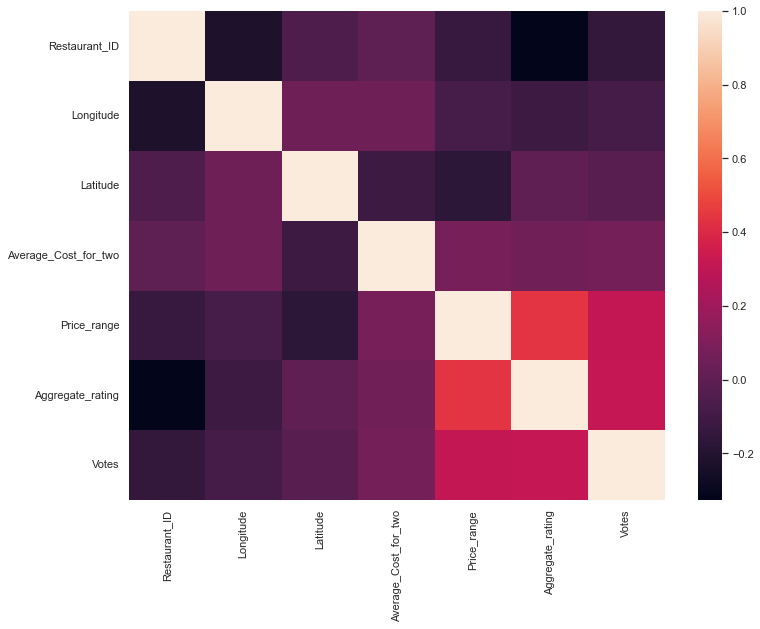

In [ ]:
import seaborn as sns
#generating heatmap
sns.set(rc = {'figure.figsize':(12,9)})
sns.heatmap(zomato.corr())

In [ ]:
zomato.describe()

,Restaurant_ID,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Made a plot to see what country had the highest rated cuisine.**

In [ ]:
df = zomato[['Cuisines','Country_Code','Votes']]

fig = px.scatter(df, x='Country_Code', y='Votes', color='Country_Code', title='Country Code vs Ratings', hover_name='Cuisines')
fig.show()

NameError: ignored

My data set is clean and ready for visualizaation of Which I used tableau in ansering specific questions as stated in [my medium article](https://medium.com/@festusvicky3/zomato-restaurant-analysis-sca-project-f197fc6f6eef#e28f). You can find my visualization [here](https://public.tableau.com/views/Zomato_16634442625700/Story2?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link).

In [ ]:
#Saving for visualization on Tableau
zomato.to_csv('zomato.csv',index=False)